In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('obesitas.csv')
df['NObeyesdad'].unique()

array(['Normal', 'Overweight', 'Obesity', 'Insufficient'], dtype=object)

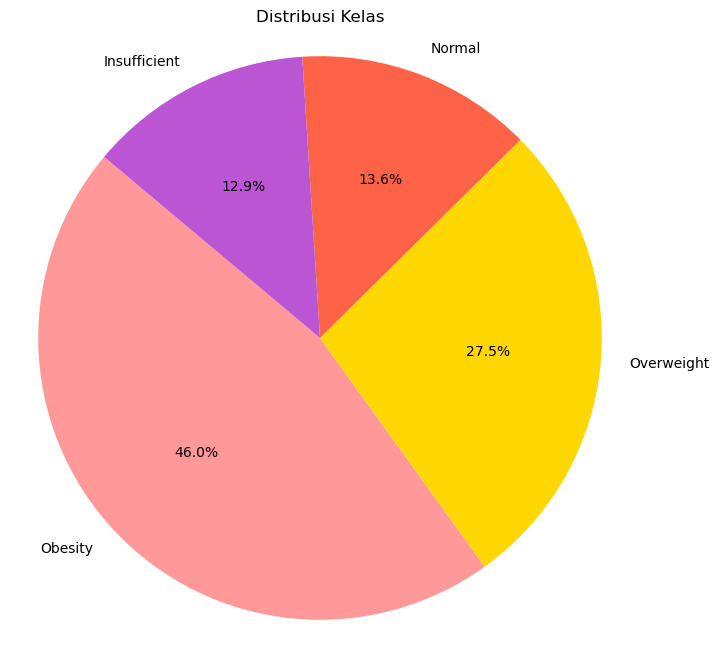

In [4]:
class_counts = df['NObeyesdad'].value_counts()

custom_colors = ['#FF9999', '#FFD700', '#FF6347', '#BA55D3']

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Distribusi Kelas')
plt.axis('equal')
plt.show()

In [5]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
df.duplicated().sum()

24

In [8]:
df.drop_duplicates(inplace=True)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity


In [9]:
X=df.drop(['NObeyesdad'],axis=1)
Y=df['NObeyesdad']
X.shape, Y.shape

((2087, 16), (2087,))

In [10]:
numerics = LabelEncoder()
X['Gender'] = numerics.fit_transform(X['Gender'])
X['family_history_with_overweight'] = numerics.fit_transform(X['family_history_with_overweight'])
X['FAVC'] = numerics.fit_transform(X['FAVC'])
X['CAEC'] = numerics.fit_transform(X['CAEC'])
X['SMOKE'] = numerics.fit_transform(X['SMOKE'])
X['SCC'] = numerics.fit_transform(X['SCC'])
X['CALC'] = numerics.fit_transform(X['CALC'])
X['MTRANS'] = numerics.fit_transform(X['MTRANS'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [32]:
metrics = []

for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    metrics.append(accuracy)

best_k = metrics.index(max(metrics))+1
best_k

4

In [33]:
k_values = list(range(1,11))

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    model = model.score(X_test, y_test)
    print(f"Accuracy for k={k}: {model}")

Accuracy for k=1: 0.9019138755980861
Accuracy for k=2: 0.8947368421052632
Accuracy for k=3: 0.8995215311004785
Accuracy for k=4: 0.9043062200956937
Accuracy for k=5: 0.9019138755980861
Accuracy for k=6: 0.8899521531100478
Accuracy for k=7: 0.8851674641148325
Accuracy for k=8: 0.8851674641148325
Accuracy for k=9: 0.8803827751196173
Accuracy for k=10: 0.8660287081339713


In [34]:
modelknn = KNeighborsClassifier(n_neighbors=4)
modelknn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [35]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.8660287081339713

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

Insufficient       0.82      0.96      0.88        55
      Normal       0.74      0.49      0.59        53
     Obesity       0.93      0.96      0.94       185
  Overweight       0.83      0.85      0.84       125

    accuracy                           0.87       418
   macro avg       0.83      0.81      0.81       418
weighted avg       0.86      0.87      0.86       418



In [37]:
df_pred = pd.DataFrame({'True':y_test, 'Prediction':y_pred})
df_pred.head(30)

,True,Prediction
1380,Obesity,Obesity
2038,Obesity,Obesity
786,Overweight,Normal
277,Normal,Overweight
1542,Obesity,Obesity
1862,Obesity,Obesity
1288,Obesity,Obesity
815,Overweight,Overweight
649,Insufficient,Insufficient
1701,Obesity,Obesity


In [38]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 53,   2,   0,   0],
       [ 11,  26,   2,  14],
       [  0,   0, 177,   8],
       [  1,   7,  11, 106]], dtype=int64)

Text(0.5, 23.52222222222222, 'True')

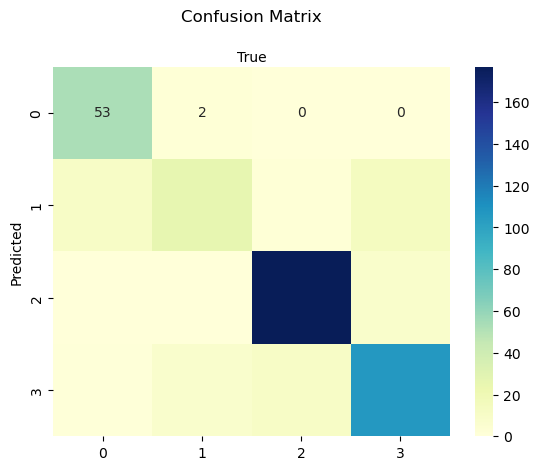

In [39]:
cnf_matrix

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Predicted')
plt.xlabel('True')

In [40]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             2087 no